## Atari Breakout Q-Learning

##### Allow memory growth for tensorflow, Windows work around

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

##### Verify GPU availability

In [2]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
#from keras import backend as K
#print(K.tensorflow_backend._get_available_gpus())

#### Constants

In [3]:
IMG_HEIGHT=100
IMG_WIDTH=100
N_FRAMES=4

n_episodes = 5000

In [4]:
from ai_image_preprocess import ImagePreprocessor

img_pp = ImagePreprocessor(IMG_WIDTH, IMG_HEIGHT)
def process(frame):
    return img_pp.preprocess(frame)

#### Training

In [ ]:
import ai_display as display
import ai_util as util
import ai_logger as logger

def train(env, agent, n_episodes, model_name="model", save_interval=100):
    for episode in range(n_episodes):
        frame = env.reset()
        state = util.create_state_arr(process(frame))
        score = 0
        
        for t in range(1000):
            #display.show_state(state[:, :, 3], env.spec.id, t, score)

            action = agent.act(state)

            next_frame, reward, done, info = env.step(action)
            next_state = util.update_state_arr(state, process(next_frame))
            
            agent.remember(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            
            if done: 
                logger.log("Episode {:>5}/{}, #frames {:>3}, score {}".format(episode+1, n_episodes, t, score))
                break
            
        agent.replay(batch_size=128)
        
        if episode % save_interval == 0:
            agent.save_model(model_name)
            
    agent.save_model(model_name)
        

#### Main

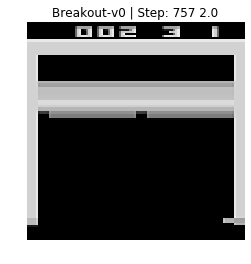

In [ ]:
from ai_agent import Agent
import gym

env = gym.make("Breakout-v0") #env = gym.make("BreakoutDeterministic-v4")
n_actions = env.action_space.n
state_shape = (IMG_WIDTH, IMG_HEIGHT, N_FRAMES)

agent = Agent(state_shape, n_actions)

model_name = "model"
agent.new_model()
#agent.load_model(model_name) 
train(env, agent, n_episodes, model_name=model_name, save_interval=50)